## Example: Applying TigerTail to Birthday Gift Data

In this notebook, we create 2 datasets and use them to demonstrate the use of the classes in the TigerTail library. The first dataset contains the timestamps at which Cassie receives a birthday gift on her birthday, along with a rating from 0-1 of how much she liked the gift. The second dataset contains Cassie's heart rate per minute of her birthday. All of this data is contained within the time range of 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../TT')
from tigertail import TimeFrame, TimeSeries, EventSeries

Here we generate a dataframe with the timestamps at which Cassie receives a gift during her birthday and her rating of each gift. We choose the gift timestamps at random from a date_range of timestamps from 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [2]:
timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-19 00:00:00', freq='1min')

gift_timestamp = np.random.choice(timestamp, size=100)
gift_timestamp

array(['1999-11-18T20:38:00.000000000', '1999-11-18T00:59:00.000000000',
       '1999-11-18T06:38:00.000000000', '1999-11-18T09:01:00.000000000',
       '1999-11-18T21:01:00.000000000', '1999-11-18T14:38:00.000000000',
       '1999-11-18T15:11:00.000000000', '1999-11-18T04:59:00.000000000',
       '1999-11-18T01:52:00.000000000', '1999-11-18T13:40:00.000000000',
       '1999-11-18T18:19:00.000000000', '1999-11-18T22:54:00.000000000',
       '1999-11-18T12:04:00.000000000', '1999-11-18T19:15:00.000000000',
       '1999-11-18T15:44:00.000000000', '1999-11-18T19:50:00.000000000',
       '1999-11-18T18:41:00.000000000', '1999-11-18T03:25:00.000000000',
       '1999-11-18T20:08:00.000000000', '1999-11-18T07:09:00.000000000',
       '1999-11-18T20:57:00.000000000', '1999-11-18T05:50:00.000000000',
       '1999-11-18T02:32:00.000000000', '1999-11-18T19:03:00.000000000',
       '1999-11-18T02:42:00.000000000', '1999-11-18T22:15:00.000000000',
       '1999-11-18T07:51:00.000000000', '1999-11-18

                     gift_rating
1999-11-18 00:01:00     0.776220
1999-11-18 00:40:00     0.481605
1999-11-18 00:59:00     0.132340
1999-11-18 01:12:00     0.013272
1999-11-18 01:52:00     0.602277
...                          ...
1999-11-18 23:04:00     0.810869
1999-11-18 23:15:00     0.934992
1999-11-18 23:20:00     0.564099
1999-11-18 23:52:00     0.509381
1999-11-18 23:55:00     0.988274

[100 rows x 1 columns]


<Axes: title={'center': 'Gifts and their ratings'}>

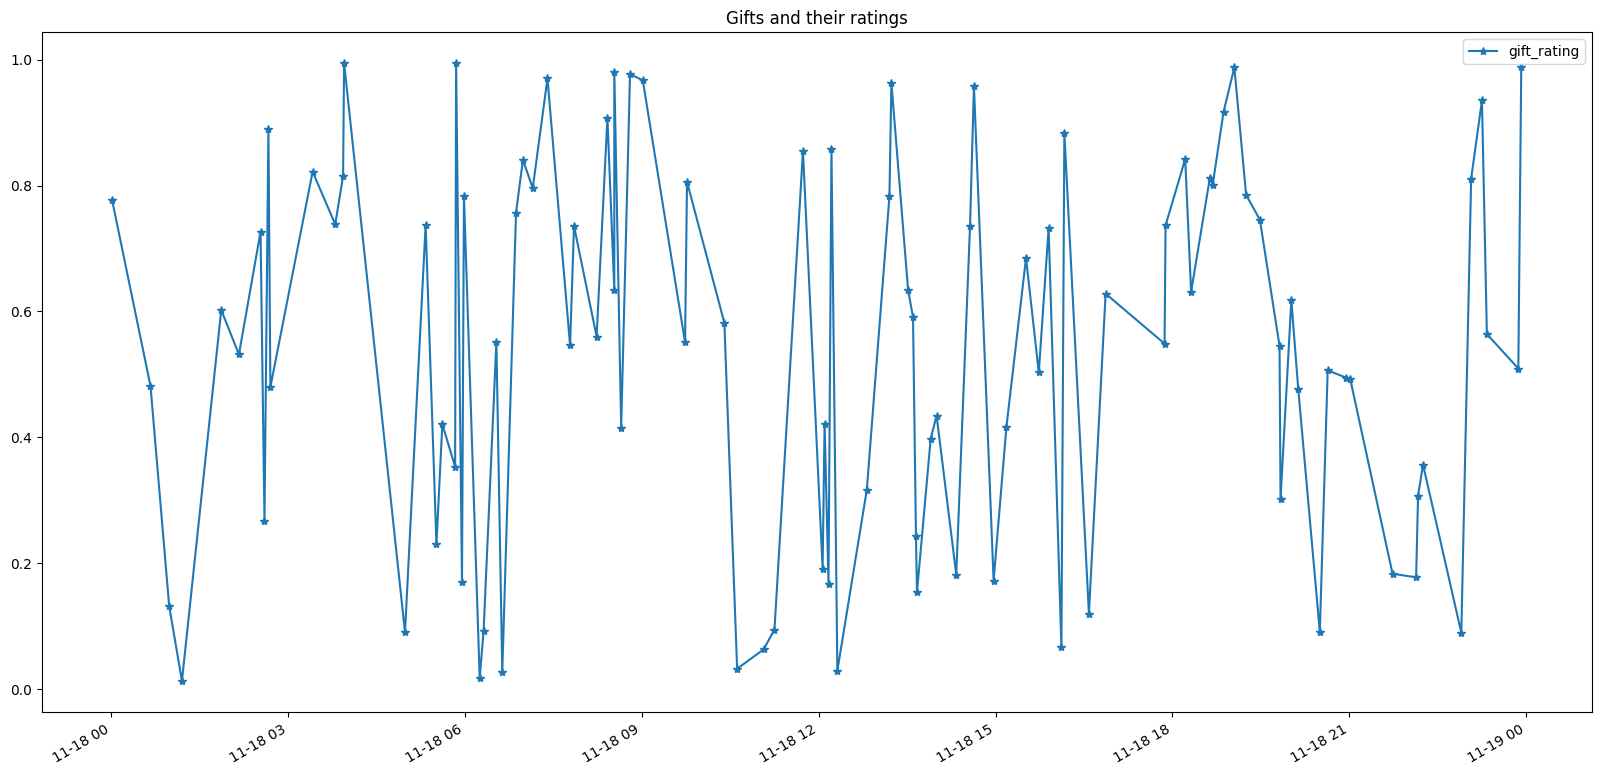

In [3]:
gift_ratings = np.random.random(100)
gift_df = pd.DataFrame({'gift_rating': gift_ratings}, index=gift_timestamp)
gift_df.sort_index(inplace=True)
print(gift_df)
gift_df.plot(title='Gifts and their ratings', figsize=(20,10), marker='*')

In [4]:
# print default agg funcs from TimeFrame class?

Now we create an EventSeries object using the birthday gift dataframe. We specify `np.mean` as the default aggregation function.

In [5]:
gift_es = EventSeries(gift_df, agg_func=np.mean)

We demonstrate how to window the gift event series data with 1 hour and 5 minute windows.

In [6]:
# demo the EventSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

window_es_h = gift_es.window('1h')
window_es_h

1999-11-18 00:00:00    0.463389
1999-11-18 01:00:00    0.307775
1999-11-18 02:00:00    0.579216
1999-11-18 03:00:00    0.842476
1999-11-18 04:00:00    0.090729
1999-11-18 05:00:00    0.527281
1999-11-18 06:00:00    0.381332
1999-11-18 07:00:00    0.761850
1999-11-18 08:00:00    0.745961
1999-11-18 09:00:00    0.774674
1999-11-18 10:00:00    0.307327
1999-11-18 11:00:00    0.337593
1999-11-18 12:00:00    0.330989
1999-11-18 13:00:00    0.538093
1999-11-18 14:00:00    0.496420
1999-11-18 15:00:00    0.584050
1999-11-18 16:00:00    0.424792
1999-11-18 17:00:00    0.642748
1999-11-18 18:00:00    0.800458
1999-11-18 19:00:00    0.673072
1999-11-18 20:00:00    0.437583
1999-11-18 21:00:00    0.337889
1999-11-18 22:00:00    0.233090
1999-11-18 23:00:00    0.761523
Freq: h, dtype: float64

<Axes: title={'center': 'Average gift rating for every 1 hr window'}>

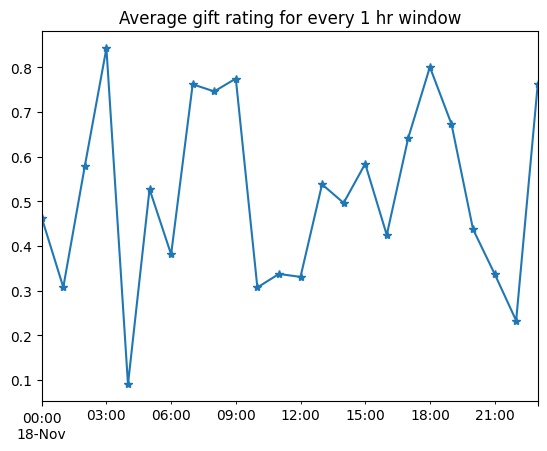

In [7]:
window_es_h.plot(title='Average gift rating for every 1 hr window', marker='*')

In [8]:
window_es_min = gift_es.window('5min')
window_es_min

1999-11-18 00:00:00    0.776220
1999-11-18 00:05:00    0.000000
1999-11-18 00:10:00    0.000000
1999-11-18 00:15:00    0.000000
1999-11-18 00:20:00    0.000000
                         ...   
1999-11-18 23:35:00    0.000000
1999-11-18 23:40:00    0.000000
1999-11-18 23:45:00    0.000000
1999-11-18 23:50:00    0.509381
1999-11-18 23:55:00    0.988274
Freq: 5min, Length: 288, dtype: float64

<Axes: title={'center': 'Average gift rating for every 5 min window'}>

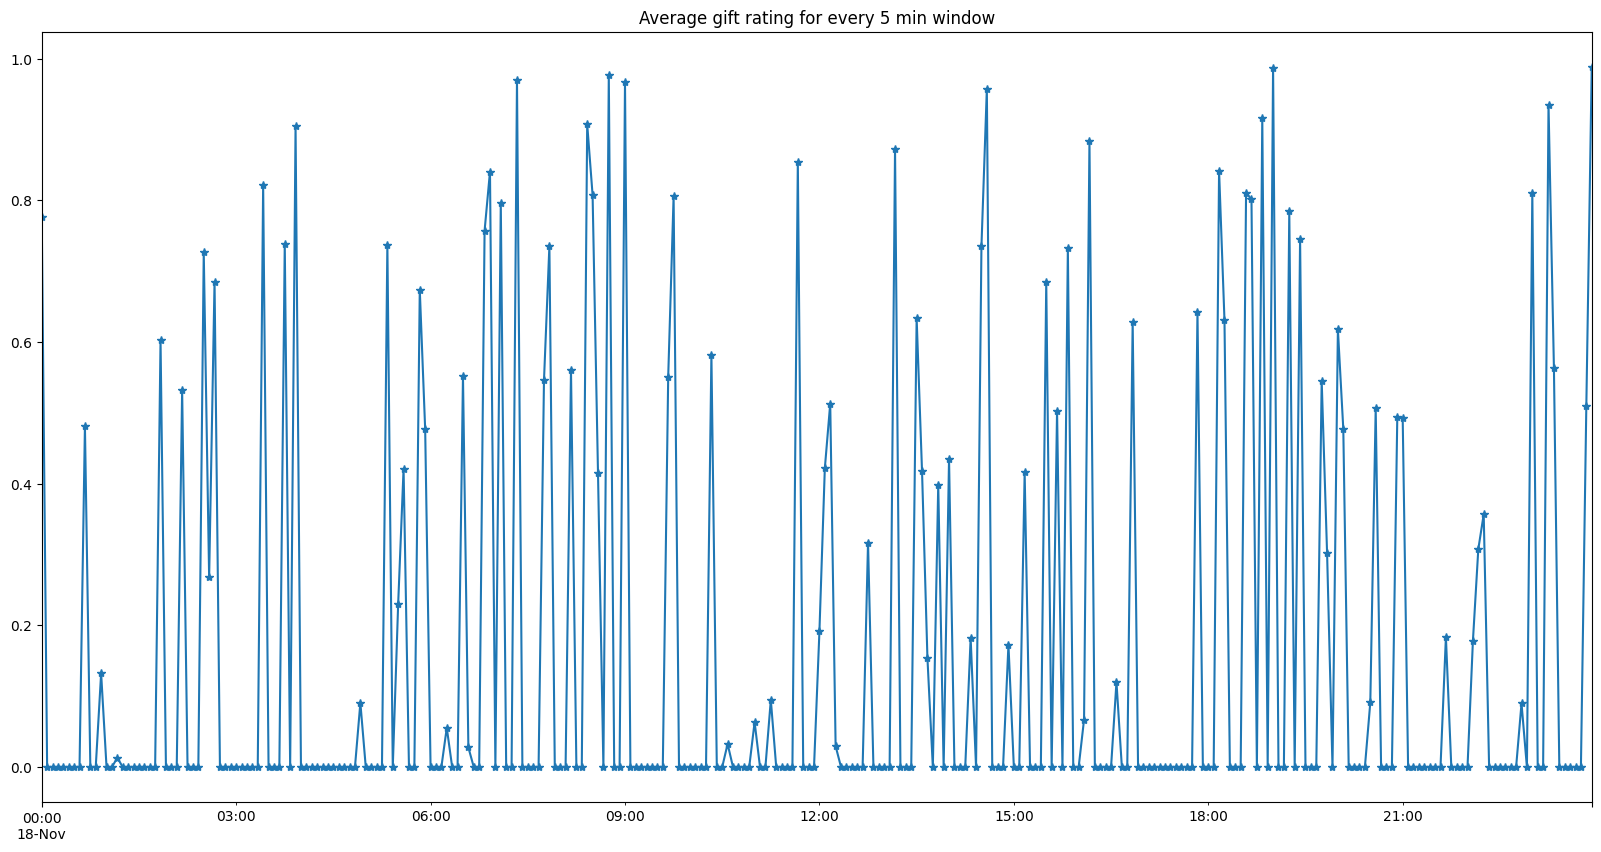

In [9]:
window_es_min.plot(title='Average gift rating for every 5 min window', marker='*', figsize=(20,10))

Now we generate the heart rate per minute dataset. First, we generate random heart rates from 60 to 130 for each minute of the day:

<Axes: title={'center': 'Heart rate per minute'}>

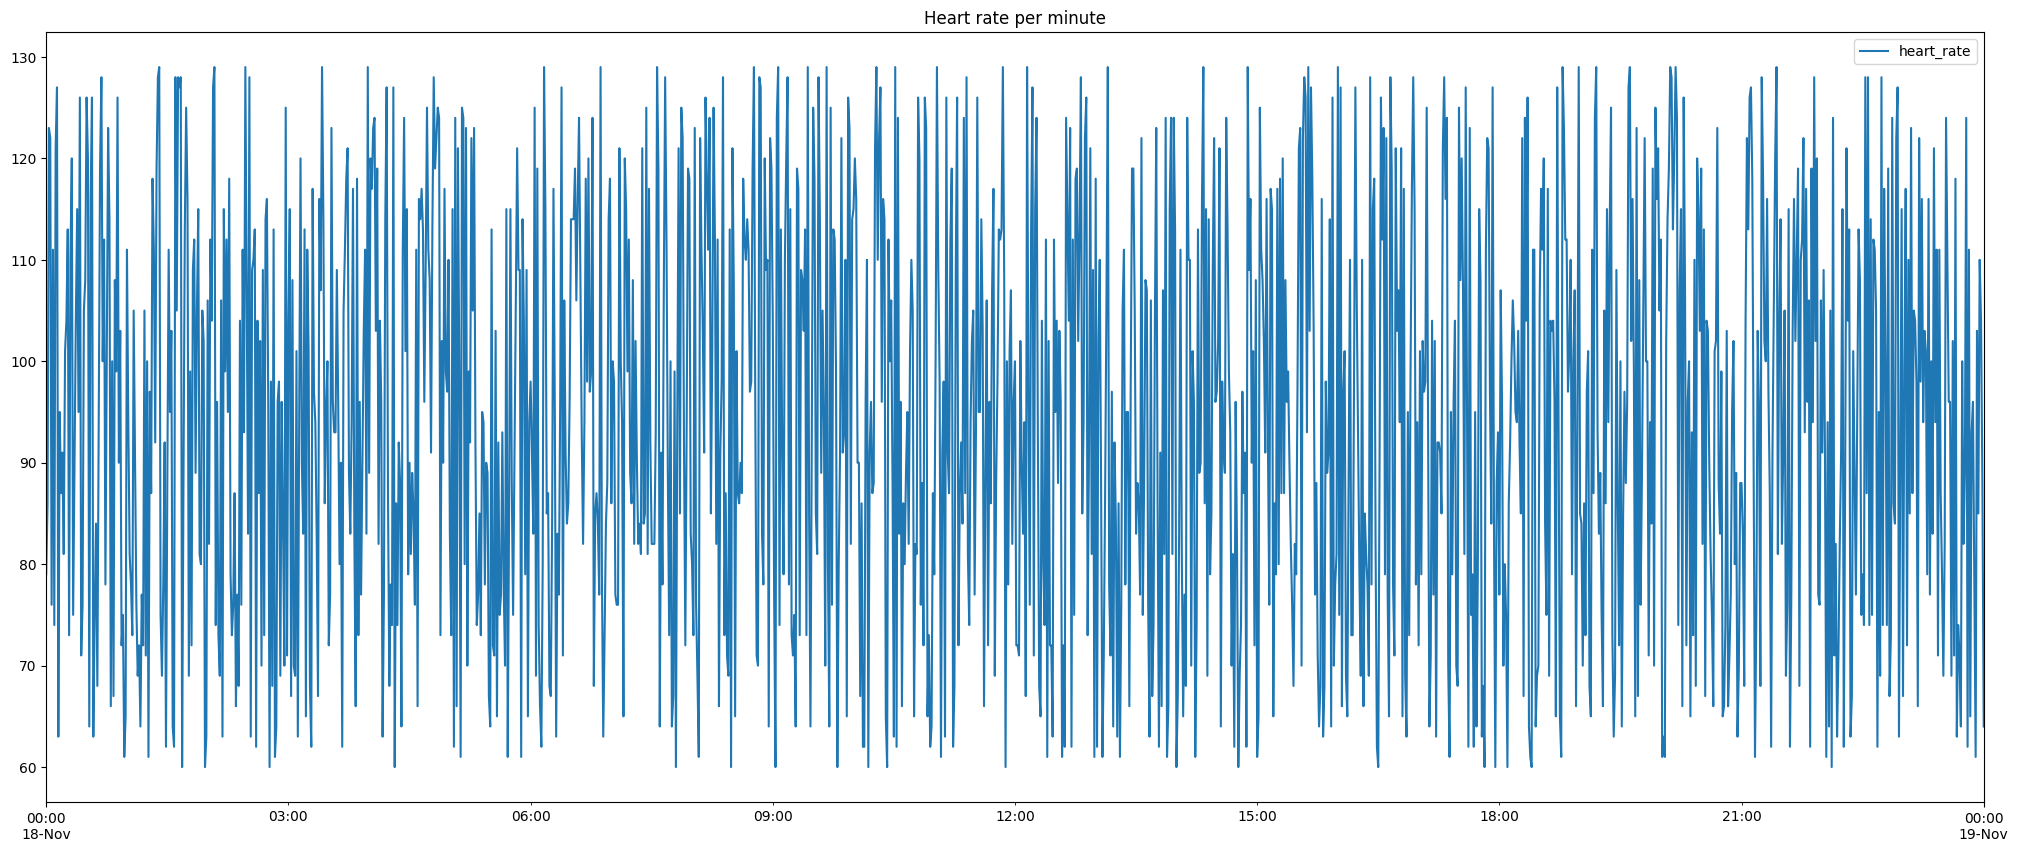

In [10]:
hr_values = np.random.randint(60, 130, size=1441)
hr_values
hr_df = pd.DataFrame({'heart_rate': hr_values}, index=timestamp)
hr_df.sort_index(inplace=True)
hr_df.plot(title='Heart rate per minute', linestyle='-', figsize=[25,10])

The code in the following cell adds to the random heart rates generated in the previous cell so that they make more sense in our context, i.e. heart rate increases when the time gets closer to a gift being given.

In [11]:
avg_hr = (np.sum(hr_values) / hr_values.size).item()

new_hr_values = []
start = 0
for time in gift_df.index:
    t_e = (60 * time.hour) + time.minute
    for t in range(start, t_e+1):
        if t == t_e:
            # add a peak heart rate value of 160 to new_hr_values
            high_hr = np.random.randint(156, 166)
            new_hr_values.append(high_hr)
            start = t + 1
            continue
        else:
            # add 1/t_i-t_e to new_hr_values
            new_hr = round(avg_hr + 60 * (1 / (t_e - t)))
            new_hr_values.append(new_hr)

if t_e+1 <= timestamp.size:
    for i in range(t_e+1, timestamp.size):
        new_hr_values.append(avg_hr)

new_hr_values

[154,
 156,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 160,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 164,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 160,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 159,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 157,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 160,
 114,
 124,
 154,
 164,
 114,
 124,
 154,
 162,
 154,
 165,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 

<Axes: title={'center': 'New heart rate per minute values'}>

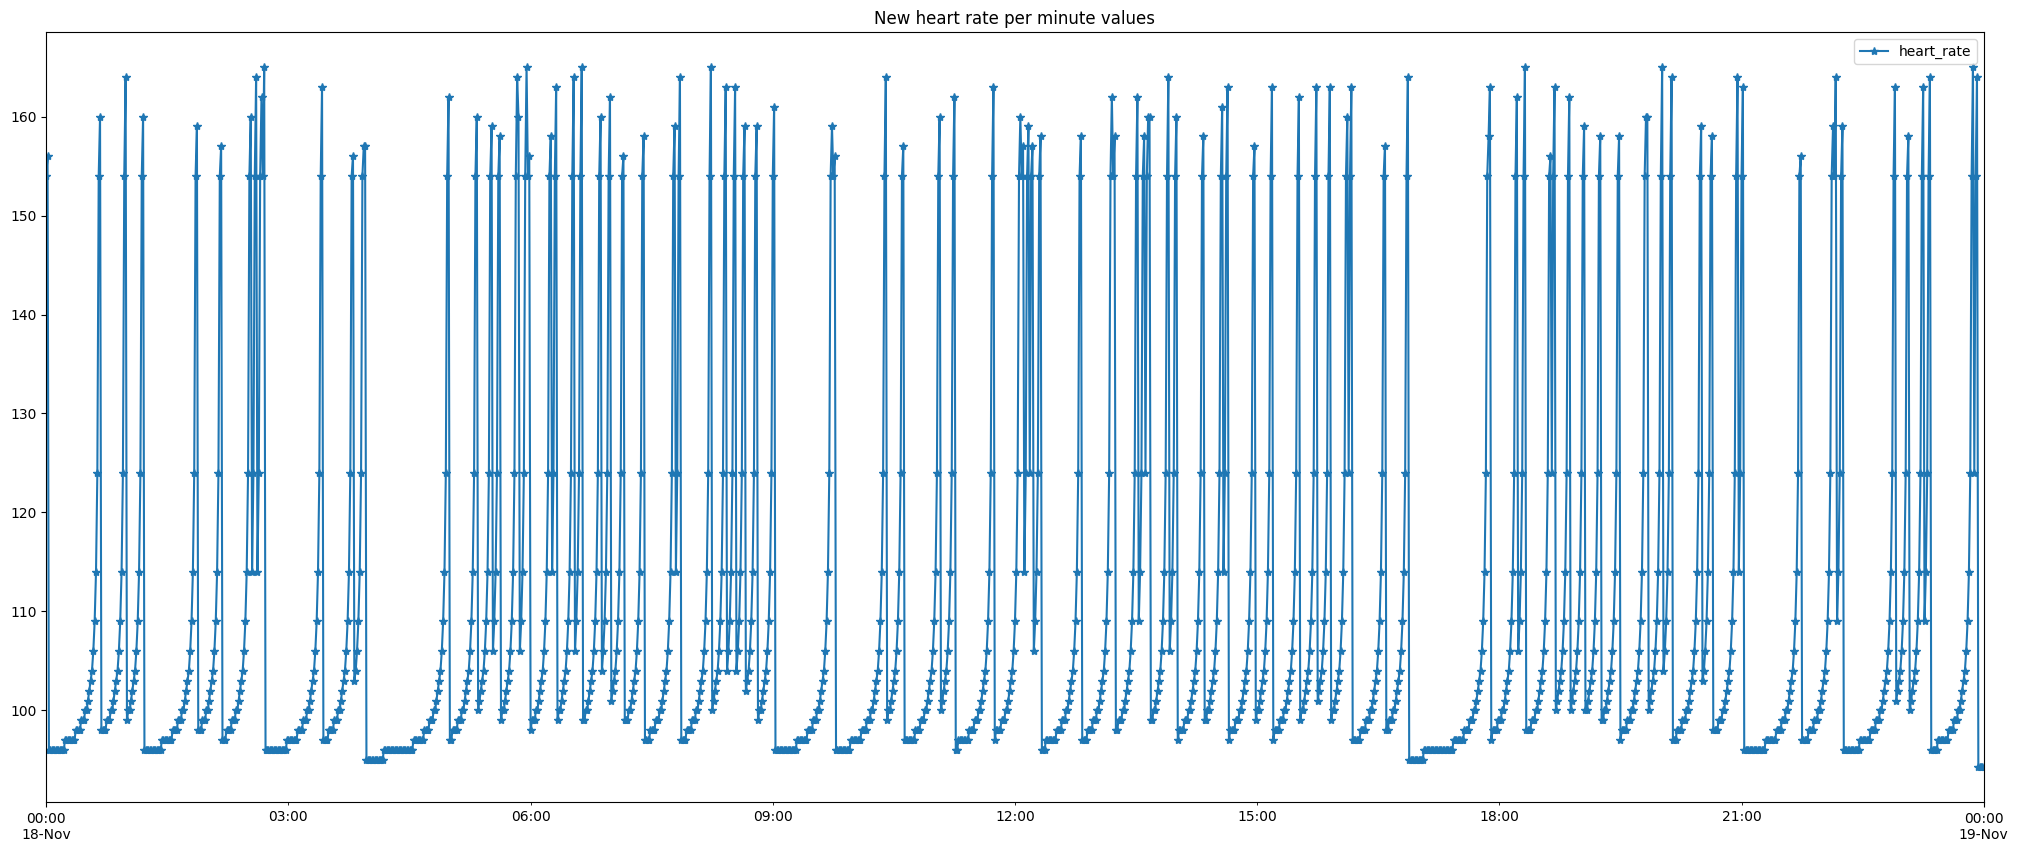

In [12]:
new_hr_df = pd.DataFrame({'heart_rate': new_hr_values}, index=timestamp)
new_hr_df.plot(title='New heart rate per minute values', marker='*', figsize=(25,10))

We create a TimeSeries object with the heart rate dataframe and also specify `np.mean` as the aggregation function:

In [13]:
hr_ts = TimeSeries(new_hr_df, agg_func=np.mean)

Index(['Windowed_df cols:heart_rate'], dtype='object')


<Axes: title={'center': 'Average heart rate (bpm) over each hour'}>

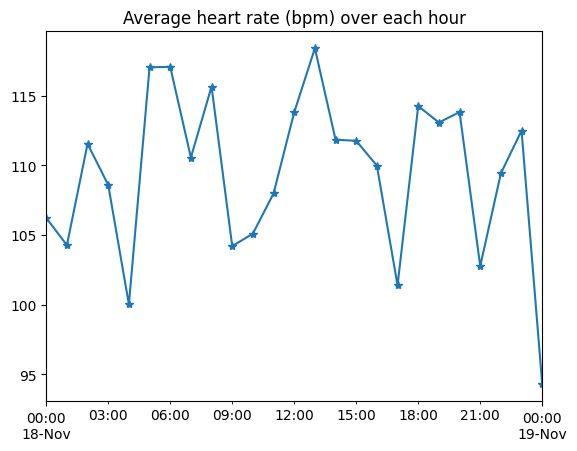

In [14]:
# demo TimeSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

hr_ts.window('1h').plot(title='Average heart rate (bpm) over each hour', marker='*')

Index(['Windowed_df cols:heart_rate'], dtype='object')


<Axes: title={'center': 'Average heart rate (bpm) over each 5 min'}>

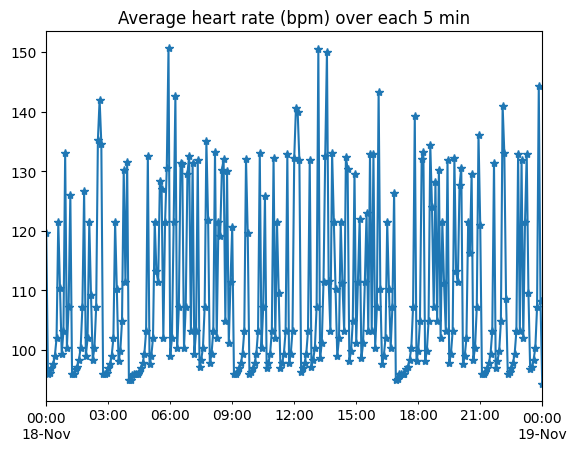

In [15]:
hr_ts.window('5min').plot(title='Average heart rate (bpm) over each 5 min', marker='*')

We then create a TimeFrame object, `tf`, and add the `hr_ts` and `gift_es` objects to it.

In [16]:
tf = TimeFrame()
tf['gift_es'] = gift_es
tf['hr_ts'] = hr_ts

In [17]:
# there's an NaN value for the last timestamp for gift_rating since there are no events 
# at that hour, the last row of the resulting dataframe could be deleted or kept

tf.window('1h')

Index(['Windowed_df cols:heart_rate'], dtype='object')


,gift_rating,heart_rate
1999-11-18 00:00:00,0.463389,106.233333
1999-11-18 01:00:00,0.307775,104.266667
1999-11-18 02:00:00,0.579216,111.550000
1999-11-18 03:00:00,0.842476,108.600000
1999-11-18 04:00:00,0.090729,100.016667
1999-11-18 05:00:00,0.527281,117.050000
1999-11-18 06:00:00,0.381332,117.083333
1999-11-18 07:00:00,0.761850,110.566667
1999-11-18 08:00:00,0.745961,115.666667
1999-11-18 09:00:00,0.774674,104.200000


Then we can make a plot of the aggregated gift events and heart rates windowed according to the frequencies that we specify.

Index(['Windowed_df cols:heart_rate'], dtype='object')


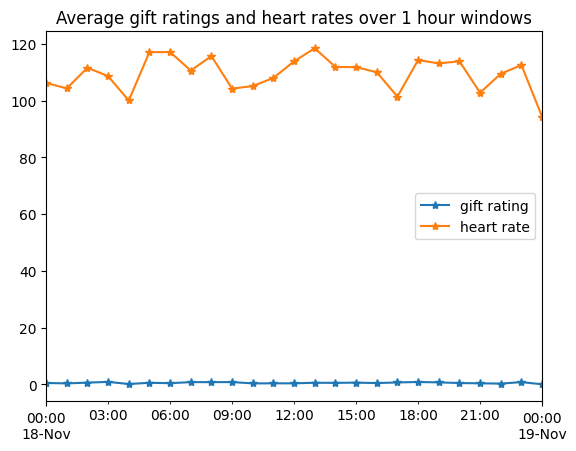

In [18]:
fig, ax = plt.subplots()
tf.window('1h').plot(ax=ax, title='Average gift ratings and heart rates over 1 hour windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

Index(['Windowed_df cols:heart_rate'], dtype='object')


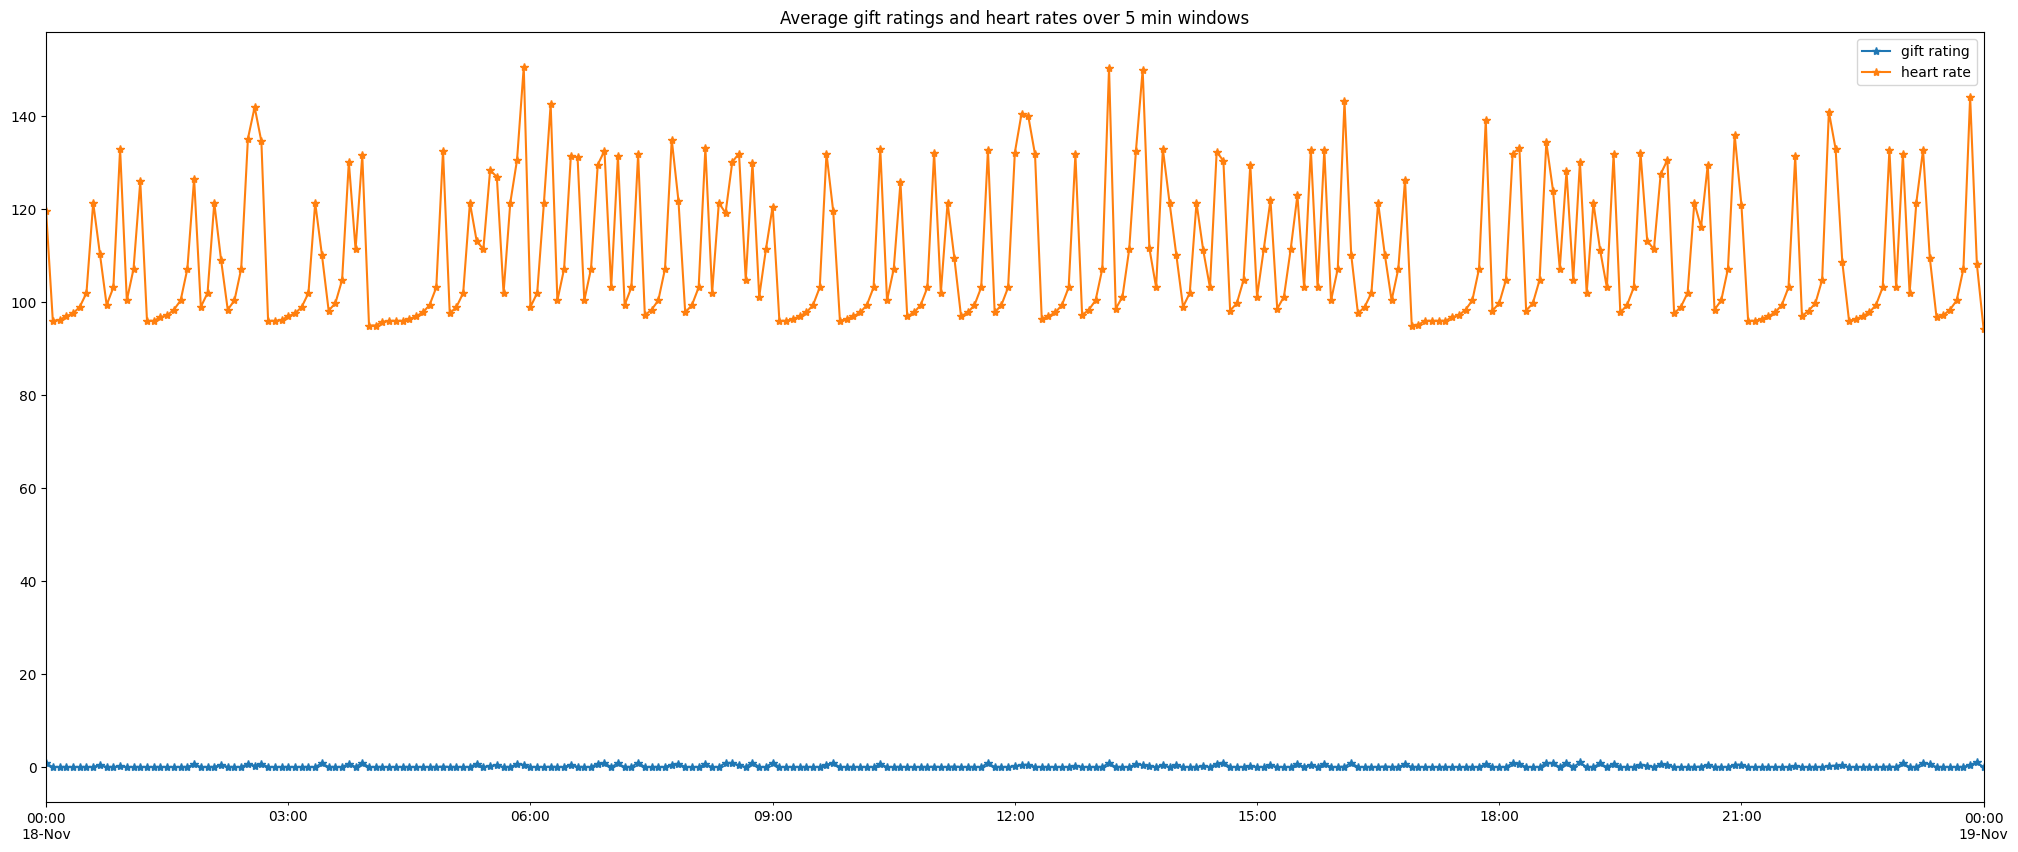

In [19]:
fig, ax = plt.subplots()
tf.window('5min').plot(figsize=(25,10), ax=ax, title='Average gift ratings and heart rates over 5 min windows', marker='*')
ax.legend(['gift rating', 'heart rate'])